In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import AcFCM

In [2]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

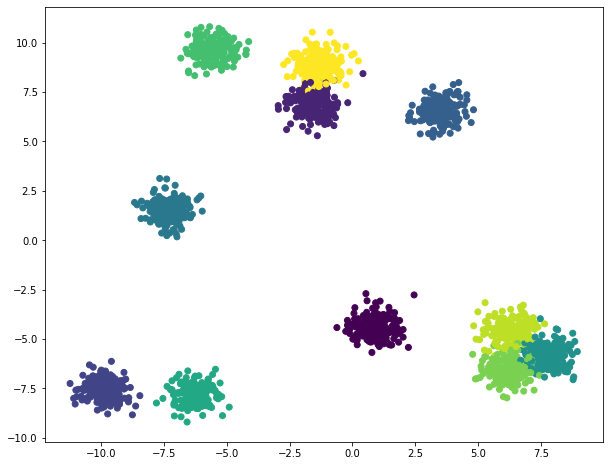

In [3]:
X, y = make_blobs(n_samples=2000, centers=11, cluster_std=0.5, random_state=100)
plot_datapoints(X, y)

V_XB: 0.4760564825883739, clusters: 20
V_XB: 0.4742792200466822, clusters: 19
V_XB: 0.46777201089528275, clusters: 18
V_XB: 0.46239027664977206, clusters: 17
V_XB: 0.4440561705741354, clusters: 16
V_XB: 0.38940050043784186, clusters: 15


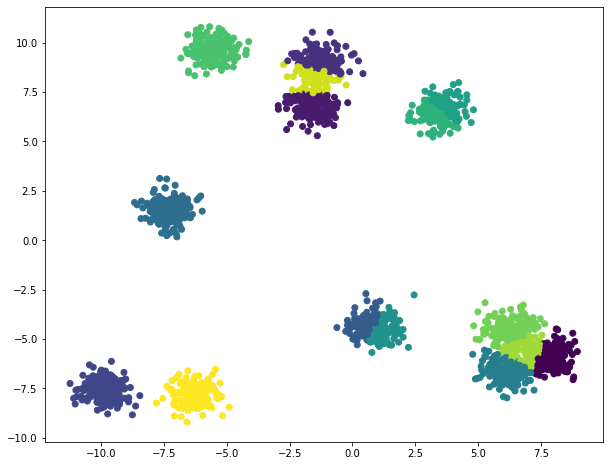

In [19]:
ac_fcm = AcFCM(X, 20)
plot_datapoints(X, np.argmax(ac_fcm.run()[0], axis=1))